<a href="https://colab.research.google.com/github/BehrangHaghdoust/ConnectedComponents/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
!wget https://github.com/Alireza-Akhavan/ML-notebooks/raw/refs/heads/main/dataset.py

--2024-10-26 22:06:57--  https://github.com/Alireza-Akhavan/ML-notebooks/raw/refs/heads/main/dataset.py
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Alireza-Akhavan/ML-notebooks/refs/heads/main/dataset.py [following]
--2024-10-26 22:06:57--  https://raw.githubusercontent.com/Alireza-Akhavan/ML-notebooks/refs/heads/main/dataset.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 917 [text/plain]
Saving to: ‘dataset.py’

dataset.py          100%[===================>]     917  --.-KB/s    in 0s      

2024-10-26 22:06:57 (42.2 MB/s) - ‘dataset.py’ saved [917/917]



In [74]:
!wget https://github.com/Alireza-Akhavan/ML-notebooks/raw/refs/heads/main/dataset/Data_hoda_full.mat -P dataset

--2024-10-26 22:10:26--  https://github.com/Alireza-Akhavan/ML-notebooks/raw/refs/heads/main/dataset/Data_hoda_full.mat
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Alireza-Akhavan/ML-notebooks/refs/heads/main/dataset/Data_hoda_full.mat [following]
--2024-10-26 22:10:27--  https://raw.githubusercontent.com/Alireza-Akhavan/ML-notebooks/refs/heads/main/dataset/Data_hoda_full.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3989009 (3.8M) [application/octet-stream]
Saving to: ‘dataset/Data_hoda_full.mat’

Data_hoda_full.mat  100%[===================>]   3.80M  --.-KB/s    in 0.1s    

2024-10

In [75]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import cv2
from dataset import load_hoda


In [87]:
X_train, y_train, X_test, y_test = load_hoda()

In [88]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [132]:
pred_classes = neigh.predict(X_test)
pred_classes

array([7, 2, 3, 1, 5, 5, 4, 7, 3, 2, 0, 8, 8, 0, 3, 9, 3, 6, 7, 4, 0, 3,
       6, 3, 9, 2, 7, 5, 2, 9, 7, 5, 5, 8, 9, 6, 5, 1, 4, 8, 8, 4, 2, 7,
       1, 2, 7, 9, 0, 3, 7, 4, 7, 5, 2, 9, 8, 2, 9, 8, 8, 6, 6, 6, 7, 6,
       2, 4, 1, 4, 4, 5, 9, 1, 8, 2, 0, 5, 6, 2, 4, 3, 2, 7, 7, 7, 7, 1,
       8, 1, 7, 8, 7, 7, 8, 9, 3, 2, 3, 1, 0, 2, 9, 7, 3, 5, 5, 0, 0, 2,
       6, 7, 9, 3, 9, 9, 8, 7, 9, 2, 5, 2, 5, 5, 9, 6, 9, 2, 0, 3, 7, 6,
       5, 2, 9, 0, 4, 1, 8, 2, 2, 3, 0, 2, 9, 3, 8, 6, 7, 0, 9, 9, 0, 7,
       6, 1, 4, 7, 9, 3, 7, 0, 7, 1, 9, 4, 7, 3, 4, 1, 5, 6, 7, 9, 1, 3,
       5, 4, 5, 7, 4, 1, 3, 3, 1, 2, 5, 3, 8, 9, 6, 7, 7, 2, 3, 0, 1, 4,
       9, 5], dtype=uint8)

In [133]:
np.mean(pred_classes == y_test)

0.96

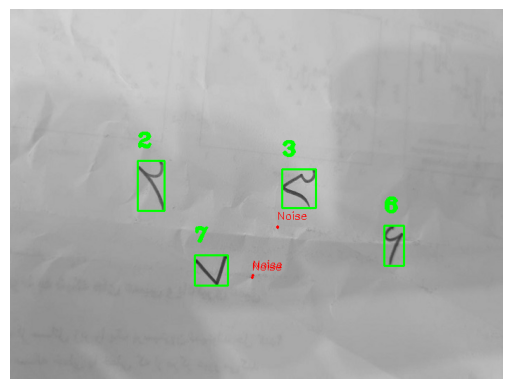

In [160]:
img = cv2.imread('persian-digits.jpg', cv2.IMREAD_GRAYSCALE)
if img is None:
    print("Error: Image file not found.")
else:
    _, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
    # Connected components analysis
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_img, connectivity=8)
    min_size = 10

    # Convert grayscale to color to display bounding boxes
    img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    # Iterate through each connected component
    for label in range(1, num_labels):  # Skip background
        x, y, w, h, area = stats[label]

        # Check if the component is larger than the minimum size
        if area >= min_size:
            # Crop the component
            digit_img = binary_img[y:y+h, x:x+w]
            # Resize to match the trained model input size
            resized_digit = cv2.resize(digit_img, (5, 5)).reshape(1, -1)

            # Predict the digit
            predicted_label = neigh.predict(resized_digit)[0]

            # Draw bounding box and label
            cv2.rectangle(img_color, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(img_color, str(predicted_label), (x, y - 20), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1.5, (0, 255, 0), 4)
        else:
            # Mark as noise for components smaller than min_size
            cv2.rectangle(img_color, (x, y), (x + w, y + h), (0, 0, 255), 2)
            cv2.putText(img_color, "Noise", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
    # Display the image with bounding boxes and labels
    plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [112]:
np.max(labels)

7